In [2]:
import os, sys
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from matplotlib import pyplot as plt
import cca_core
%matplotlib inline


In [3]:
# Rank Correlation of SVCCA mean model correlation (net similarity) and Transferability (Transfer Performance increase)
def rank_pearson_corr(transferability, svcca_corr_all):
    # spearman roh rank-correlation
    spearman_corr, spearman_pvalue = stats.spearmanr(transferability, svcca_corr_all)
    print("Spearman Correlation:", spearman_corr)
    print("Spearman p_value:", spearman_pvalue)
    print("")
    # kendall tau rank-correlation
    kendall_tau, kendall_p_value = stats.kendalltau(transferability, svcca_corr_all)
    print("Kendall Correlation:", kendall_tau)
    print("Kendall p_value:", kendall_p_value)
    print("")
    # pearson linear correlation for comparison
    pearson_corr, pearson_pvalue = stats.pearsonr(transferability, svcca_corr_all)
    print("Pearson Correlation:", pearson_corr)
    print("Pearson p_value:", pearson_pvalue)

# Net similarity for models trained on data set starting 2014

In [4]:
base_net_similarities = pd.read_csv('../temp/net_similarity_weekly_start2014.csv')

# net_similarities visualization
print("Net Similarity:")
cm = sns.light_palette("green", as_cmap=True)
net_sim_visual = base_net_similarities.style.background_gradient(cmap=cm)
net_sim_visual

Net Similarity:


,0,1,2,3,4,5
0,0.988213,0.786787,0.80148,0.75047,0.791899,0.739984
1,0.775239,0.991707,0.810734,0.755409,0.787145,0.760678
2,0.794107,0.799018,0.989077,0.777489,0.809577,0.739949
3,0.73968,0.739943,0.77783,0.987722,0.766378,0.750067
4,0.774914,0.774874,0.812163,0.761128,0.994907,0.770109
5,0.728996,0.756628,0.746143,0.756543,0.762224,0.994823


columns: target model activation on target data set e.g. N1_D1, N2_D2, ...

rows: source model activation on target data set e.g. N1_D1, N2_D1, N3_D1, ...

The source model activation is calculated on the target model's data input!

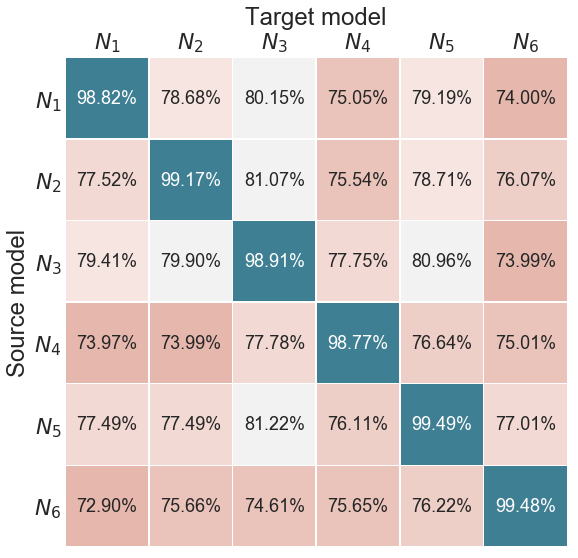

In [5]:
# heatmap for net similarities

sns.set(font_scale=2)
ma = sns.diverging_palette(20, 220, n=30)
# calculate mean of similarity values to adjust color grading
net_sim_mean = base_net_similarities.values.mean()

f, ax = plt.subplots(figsize=(9, 9))
ax.set_title('Target model')
#ax.set_xlabel('Target branch', fontsize=20)
ax.tick_params(length=0)
ax.xaxis.tick_top()
#ax.set_xlabel('Target data set')
#rotation='horizontal'
#ax.xaxis.set_label_position('top') 
sns.heatmap(base_net_similarities, annot=True, annot_kws={"size": 18}, fmt=".2%", linewidths=0.5,
            ax=ax,robust=True, cmap=ma, center=net_sim_mean, cbar=False, 
            xticklabels=['$N_1$','$N_2$','$N_3$','$N_4$','$N_5$','$N_6$'], yticklabels=['$N_1$','$N_2$','$N_3$','$N_4$','$N_5$','$N_6$']) #'RdBu_r'
plt.yticks(rotation=0)
plt.ylabel('Source model')
plt.show()

Color grading is not optimal! 

Therefore plot net similarity heatmap without values=1 (without diagonal)

In [6]:
# flatten dataframe to array
net_sim_array = np.ravel(base_net_similarities.values)

# Net similarity without correlation ~ 1 (diagonal)
nan_this_values = [0,7,14,21,28,35]
net_sim_array[nan_this_values] = np.nan
relevant_net_sim = np.split(net_sim_array, 6)
relevant_net_sim = pd.DataFrame(relevant_net_sim)

# calculate mean value of colums and mean on column means for color grading of heatmap
column_means = relevant_net_sim.mean()
mean_df = column_means.mean()

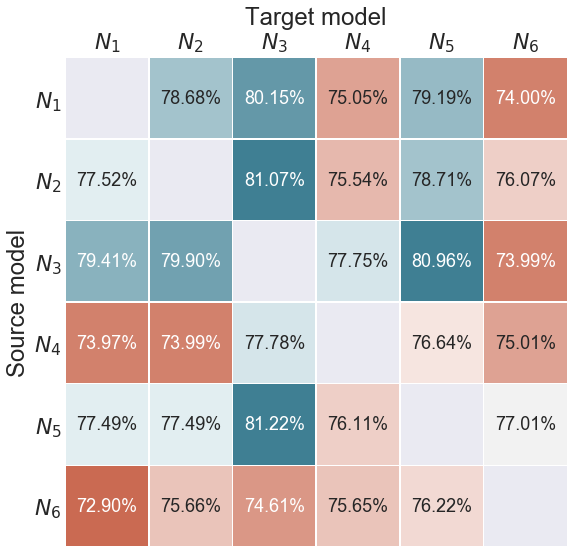

In [18]:
# heatmap
f, ax = plt.subplots(figsize=(9, 9))
ax.set_title('Target model')
#ax.set_xlabel('Target branch', fontsize=20)
ax.tick_params(length=0)
ax.xaxis.tick_top()
#ax.set_xlabel('Target data set')
#rotation='horizontal'
#ax.xaxis.set_label_position('top') 
sns.heatmap(relevant_net_sim, annot=True, annot_kws={"size": 18}, fmt=".2%", linewidths=0.5,
            ax=ax,robust=True, cmap=ma, center=mean_df, cbar=False, 
            xticklabels=['$N_1$','$N_2$','$N_3$','$N_4$','$N_5$','$N_6$'], yticklabels=['$N_1$','$N_2$','$N_3$','$N_4$','$N_5$','$N_6$']) #'RdBu_r'
plt.yticks(rotation=0)
plt.ylabel('Source model')
plt.show()

# Transferability (models trained with data start 2014) for comparison

In [8]:
# 1st degree of transfer (start 2014) values copied from excel file

transferability_start2014 = [
[0,0.013423099,-0.092960932,0.062774231,-0.109191589,-0.012277359],
[-0.028010412,0,0.006744329,0.104365015,-0.077356795,-0.052918723],
[0.010684786,0.059061465,0,0.056678394,-0.074594115,0.013772928],
[0.029124452,-0.004325828,-0.155972262,0,-0.112854208,0.033113055],
[0.037406918,-0.031099238,-0.080301646,0.055497872,0,0.011009972],
[0.04302586,0.031204251,-0.076830507,0.076993579,-0.079175326,0]
]

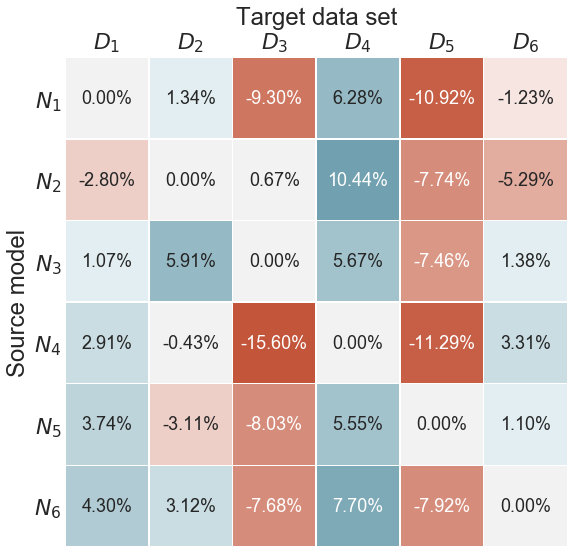

In [9]:
transferability = pd.DataFrame(transferability_start2014)

sns.set(font_scale=2)
ma = sns.diverging_palette(20, 220, n=30)

f, ax = plt.subplots(figsize=(9, 9))
ax.set_title('Target data set')
#ax.set_xlabel('Target branch', fontsize=20)
ax.tick_params(length=0)
ax.xaxis.tick_top()
#ax.set_xlabel('Target data set')
#rotation='horizontal'
#ax.xaxis.set_label_position('top') 
sns.heatmap(transferability, annot=True, annot_kws={"size": 18}, fmt=".2%", linewidths=0.5,
            ax=ax,robust=True, cmap=ma, center=0, cbar=False, 
            xticklabels=['$D_1$','$D_2$','$D_3$','$D_4$','$D_5$','$D_6$',], yticklabels=['$N_1$','$N_2$','$N_3$','$N_4$','$N_5$','$N_6$']) #'RdBu_r'
plt.yticks(rotation=0)
plt.ylabel('Source model')
plt.show()

In [10]:
# flatten dataframes to array for correlation calculation

# Transferability data frame
transfer_array = np.ravel(transferability.values)

In [11]:
# Rank (Spearman) and Pearson Correlation 
# without transferability=0 and net_similarity=1 for all branches / diagonal in matrix
print('Rank and Pearson Correlation without transferability=0 and net_similarity=1 for all branches')
print("")

relevant_indices = [1,2,3,4,5,6,8,9,10,11,12,13,15,16,17,18,19,20,22,23,24,25,26,27,29,30,31,32,33,34]
# len(transfer_array[relevant_indices])
#rank_pearson_corr(transfer_array, net_sim_array)
rank_pearson_corr(transfer_array[relevant_indices], net_sim_array[relevant_indices]) #

Rank and Pearson Correlation without transferability=0 and net_similarity=1 for all branches

Spearman Correlation: -0.385539488320356
Spearman p_value: 0.0353717951335503

Kendall Correlation: -0.25517241379310346
Kendall p_value: 0.04907734410780932

Pearson Correlation: -0.35525370163793163
Pearson p_value: 0.05404245753369737


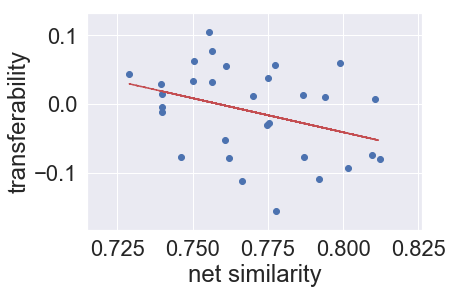

In [15]:
# plot values for net_sim and transferability
x = net_sim_array[relevant_indices]
y = transfer_array[relevant_indices]

plt.scatter(x, y)
plt.xlabel('net similarity')
plt.ylabel('transferability')
# trendline
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.show()